# Lab - Data-Centric Evaluation of ML Models

This lab is intended to accompany the lecture on Data-Centric Evaluation of ML Models. In this lab, you are given a training dataset and your goal is to improve the dataset in order to boost the accuracy of a fixed classification model on a given (fixed) test dataset. Reviewing the lecture notes will be helpful to get some ideas.

You can get all the dependencies you need for this notebook by running:

In [1]:
!pip install cleanlab matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 2.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 2.2 MB/s eta 0:00:00a 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import balanced_accuracy_score

import matplotlib.pyplot as plt

In [3]:
SEED = 123
np.random.seed(SEED)  # for reproducibility

# Load dataset

The data come from a 3-class classification task where the goal is to predict `y` based on features `x1`, ..., `x5`.
We convert the data to a numpy array format.

In [4]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
df.head()

,x0,x1,x2,x3,x4,x5,y
0,-0.333489,-0.770208,-2.697486,-0.628563,-1.277720,100.0,2
1,-0.787124,1.230800,1.415472,-0.805927,0.175115,100.0,1
2,0.781197,-0.856227,2.138879,2.495417,0.868192,100.0,1
3,1.895093,-0.885939,1.946352,-2.082747,0.064914,100.0,1
4,0.689091,-5.091299,-2.218682,0.330767,3.012755,100.0,2


In [6]:
df_test.head()

,x0,x1,x2,x3,x4,x5,y
0,2.337701,-0.681121,1.883774,0.949812,-0.311507,-100.0,1
1,1.101249,-2.032961,0.344490,0.724925,1.355534,-100.0,2
2,1.791349,-2.808856,-1.409471,0.552069,0.433901,100.0,2
3,2.082599,0.811498,0.906920,-0.749352,1.974424,-100.0,2
4,1.214627,-0.448392,1.812024,0.429543,0.396450,-100.0,1


In [8]:
y = df["y"].values
df.drop(columns=["y"], inplace=True)
X = df.values

y_test = df_test["y"].values
df_test.drop(columns=["y"], inplace=True)
X_test = df_test.values

print(X)
print(y)

[[  -0.33348927   -0.7702077    -2.69748604   -0.62856274   -1.27772042
   100.        ]
 [  -0.7871239     1.23080016    1.41547226   -0.8059272     0.1751147
   100.        ]
 [   0.78119711   -0.85622725    2.13887864    2.49541712    0.86819164
   100.        ]
 ...
 [   1.19101444   -1.72465036   -1.17854745   -1.54881816   -1.51740071
  -100.        ]
 [  -2.03358571   -0.23977122    1.21509471    0.86023614    0.69816843
   100.        ]
 [   0.15125519   -1.21711969    2.77498591    0.7090941     0.89159205
  -100.        ]]
[2 1 1 ... 2 1 1]


Here's a simple plot of the first two features, colored by class. Visualizing the dataset may be helpful to you in this assignment, but can be tricky with 6-dimensional features!

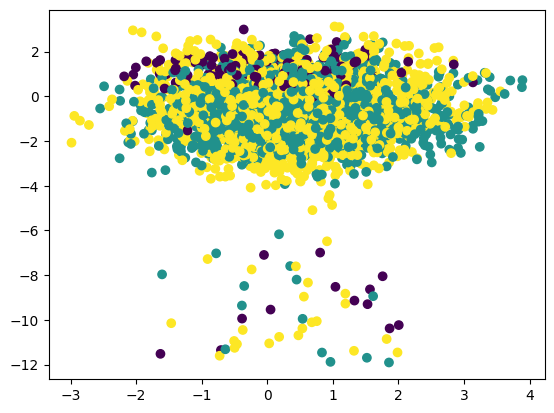

In [9]:
plt.scatter(X[:,0], X[:,1], c=list(y))

# Improve ML Model via data-centric techniques

We train a simple neural network model (Multi-Layer Perceptron classifier) and evaluate it on the given test set. 
Note that the evaluation metric used is `balanced_accuracy`. This is the accuracy amongst all examples in a given class, averaged over all classes, which better represents performance on minority classes.

You should never change the test data labels `y_test` in this lab, nor the neural network model. You may change the training data `X`, `y` as you see fit, and update `X_test` accordingly so your model is able to make predictions on it.

In [10]:
def train_evaluate_model(X, y, X_test, y_test):
    model = MLPClassifier(early_stopping=True, random_state=SEED)
    model.fit(X, y)
    predictions = model.predict(X_test, 
    acc = balanced_accuracy_score(y_true=y_test, y_pred=predictions)
    print(f"Balanced accuracy = {acc}")
    return predictions

A baseline version of the model is trained on the original given data:

In [11]:
predictions = train_evaluate_model(X, y, X_test, y_test)

Balanced accuracy = 0.5759397707696671


# Exercise

Your goal is to produce a version of this same model that has much better test accuracy! 
You should accomplish this by changing `X` and `y` as you see fit. Consider various ideas presented in the lecture and look through the data yourself to see if other ideas come to mind! Greater than 80% test accuracy is achievable without modifying the model at all. If you choose to drop/add features to `X` or renormalize some values, then you'll want to apply these operations to `X_test` as well.

In [ ]:
## TODO: find my_X, my_y such that train_evaluate_model(my_X, my_y, X_test, y_test)
## reports better (higher) performance.


### First Step Standardize
To reduce the impact of extreme  points, we use z standardization

In [15]:
X_s = (X - np.mean(X)) / np.std(X)
X_test_s = (X_test - np.mean(X_test)) / np.std(X_test)

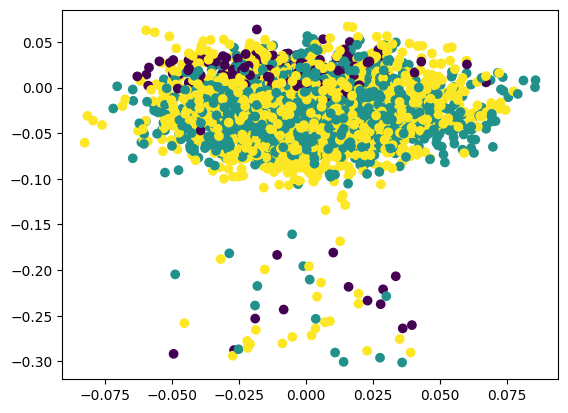

In [16]:
plt.scatter(X_s[:,0], X_s[:,1], c=list(y))

In [17]:
predictions = train_evaluate_model(X_s, y, X_test_s, y_test)

Balanced accuracy = 0.5570057330175427


## Second Step find Label Errors


In [21]:
import cleanlab
from sklearn.model_selection import cross_val_predict
model = MLPClassifier(early_stopping=True, random_state=SEED)
pred_probs = cross_val_predict(model, X_test, y_, cv=5, method='predict_proba')
pred_probs


array([[0.00810294, 0.00332081, 0.98857625],
       [0.37298977, 0.43174109, 0.19526914],
       [0.01029023, 0.9095749 , 0.08013487],
       ...,
       [0.02509337, 0.07053149, 0.90437515],
       [0.07990728, 0.61688262, 0.3032101 ],
       [0.02949609, 0.92964535, 0.04085855]])

In [24]:

label_issues = cleanlab.filter.find_label_issues(pred_probs=pred_probs, labels=y, return_indices_ranked_by='self_confidence')


In [30]:
label_issues

array([3060, 2984,  633,  100,  204,  610, 2814, 2670, 1170,  452, 1296,
       3351, 2790, 3055, 1926, 2862, 1617, 1839,  802, 3050, 1381, 2379,
       1951, 3071,  968, 1065, 2392, 1025, 1551, 3623, 3734,  387, 2452,
       3196, 1668, 2071,  734, 3333, 3219,  639, 2802, 2133, 1766, 2486,
        137, 3584, 1586, 2292,  111, 2668, 3716, 2801,  166,  794, 2302,
       3375,  500, 2416,  960, 2710,  923, 1693, 3570,  628, 1572, 1432,
       2808, 2812,  501, 2161, 1957, 1345, 3454, 1304, 1327, 3161, 1664,
       1356, 3650, 1193, 3513, 1687,  213, 1017, 2024, 3485, 1803, 3274,
       2623, 1267, 2260, 1584, 1712, 3352, 1806,  980,  851, 3827, 3663,
         34, 3064, 2146, 3495, 1051, 2921, 1743, 3641,  912, 3804, 2420,
        779,  391,  703,  105,  569, 3096,  392, 2246, 1411, 1338, 3420,
        358,  632, 2271, 2245, 2418, 2359, 2147, 1286, 3780, 2307, 1495,
       2497,  232, 1101, 3531,  163,  900,  378, 1638, 1081,  833,   17,
       3012, 1183, 2633, 2286, 2282,  938, 1268, 32

In [29]:
y.shape

(3870,)

In [34]:
X_s_clean = X_s[~label_issues]
y_clean = y[~label_issues]

In [33]:
X_s[~label_issues]

array([[ 4.63179551e-03, -2.14399865e-02,  4.42446872e-02,
         6.55174008e-03, -3.43340778e-02, -2.45798471e+00],
       [-2.89431462e-02, -2.67871334e-02,  3.26823254e-02,
         7.56640052e-03, -1.82185678e-03, -2.45798471e+00],
       [ 3.43114748e-02, -3.65979478e-02,  3.40514663e-02,
        -5.59101553e-02,  1.02219200e-02, -2.45798471e+00],
       ...,
       [ 3.12411991e-02, -2.64765787e-02,  2.43345071e-02,
         1.38322919e-02,  1.00512576e-02,  2.43869247e+00],
       [-2.75121516e-02, -2.21671730e-02, -6.05177188e-02,
        -1.44622682e-02,  3.09008510e-02,  2.43869247e+00],
       [-1.90600827e-02, -3.16805313e-02,  4.69953467e-02,
         3.54589721e-02, -5.71716452e-02,  2.43869247e+00]])

In [35]:
predictions = train_evaluate_model(X_s_clean, y_clean, X_test_s, y_test)

Balanced accuracy = 0.3898275688729151
